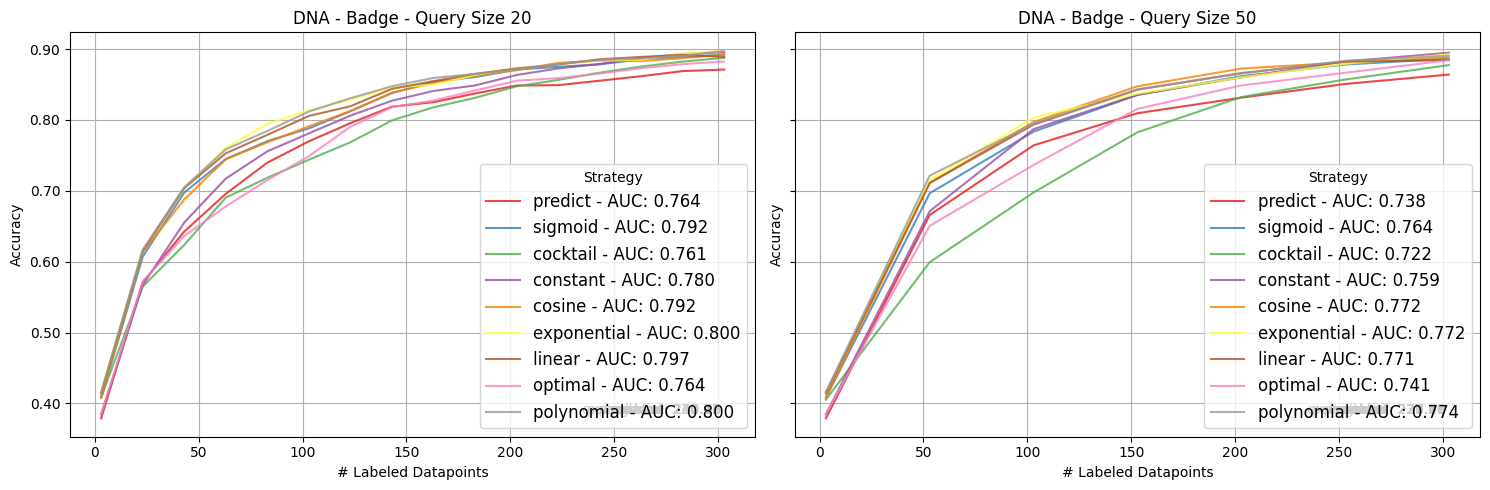

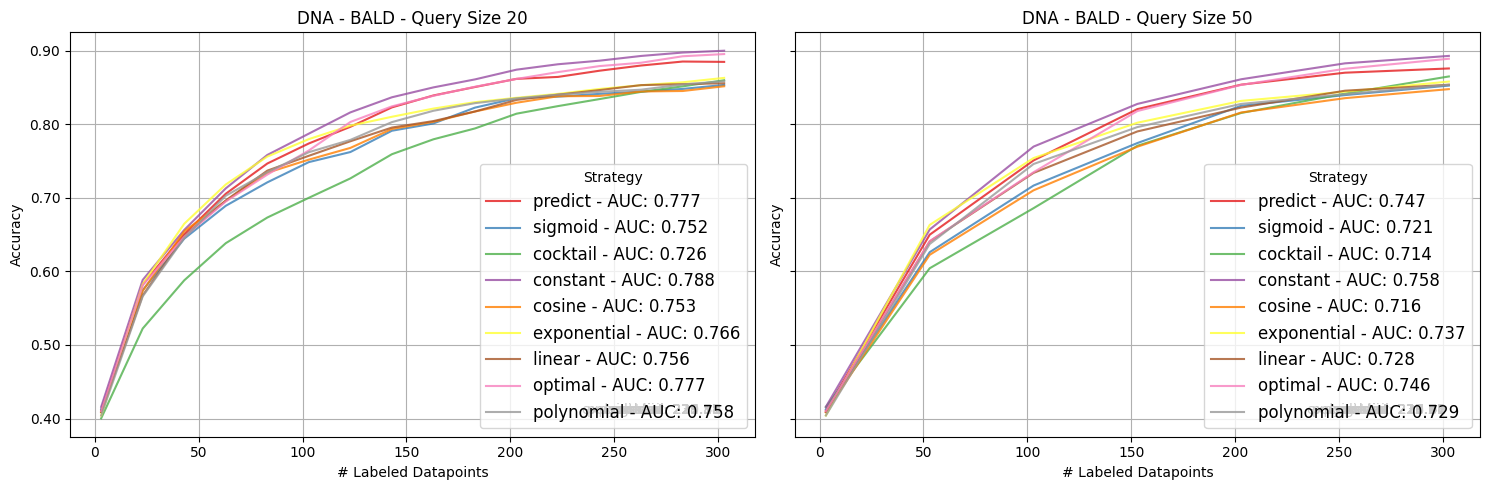

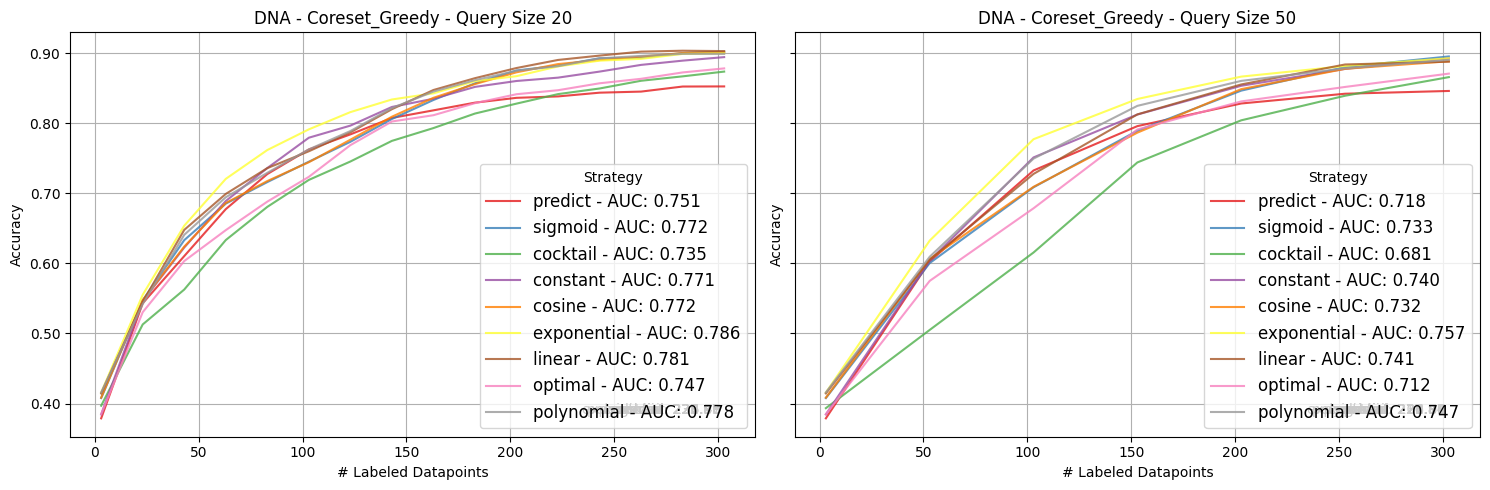

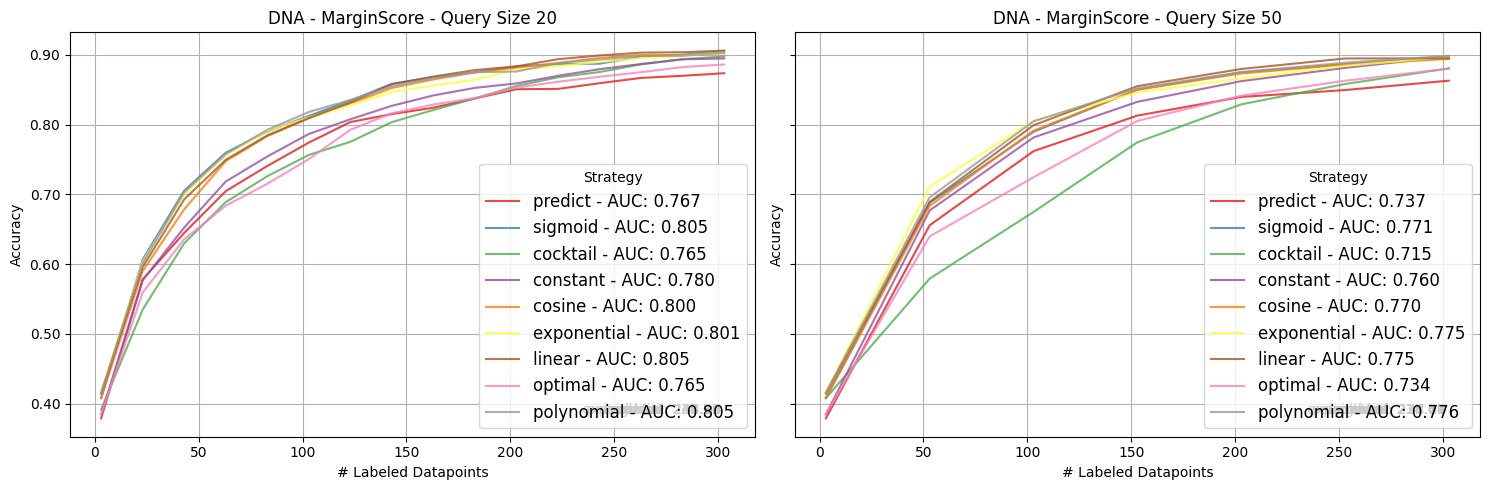

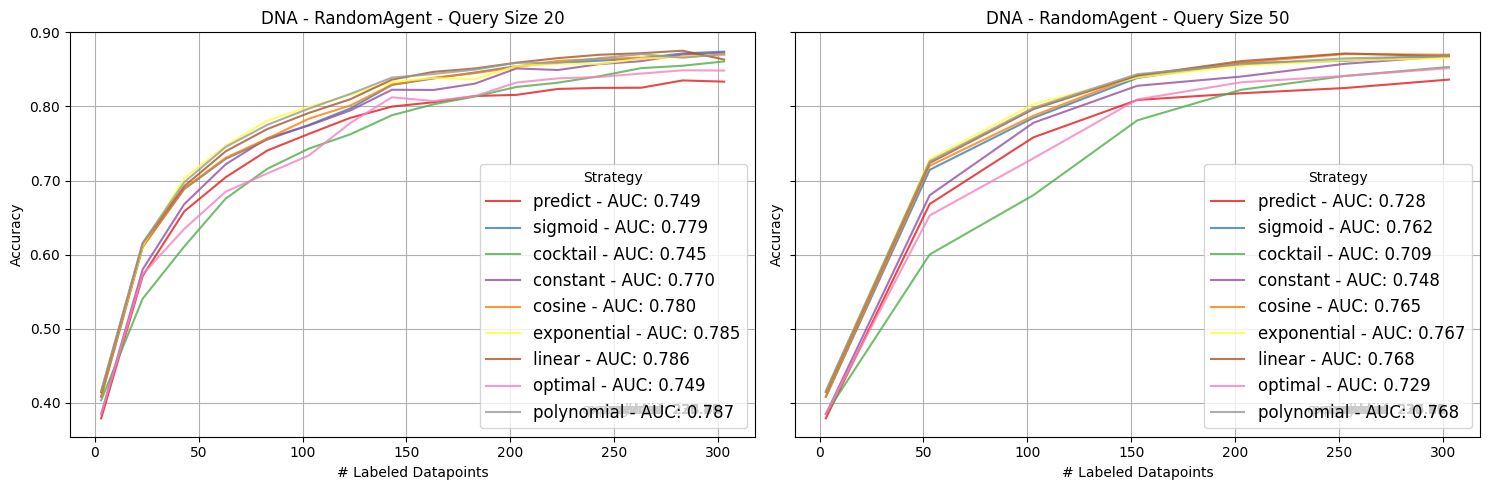

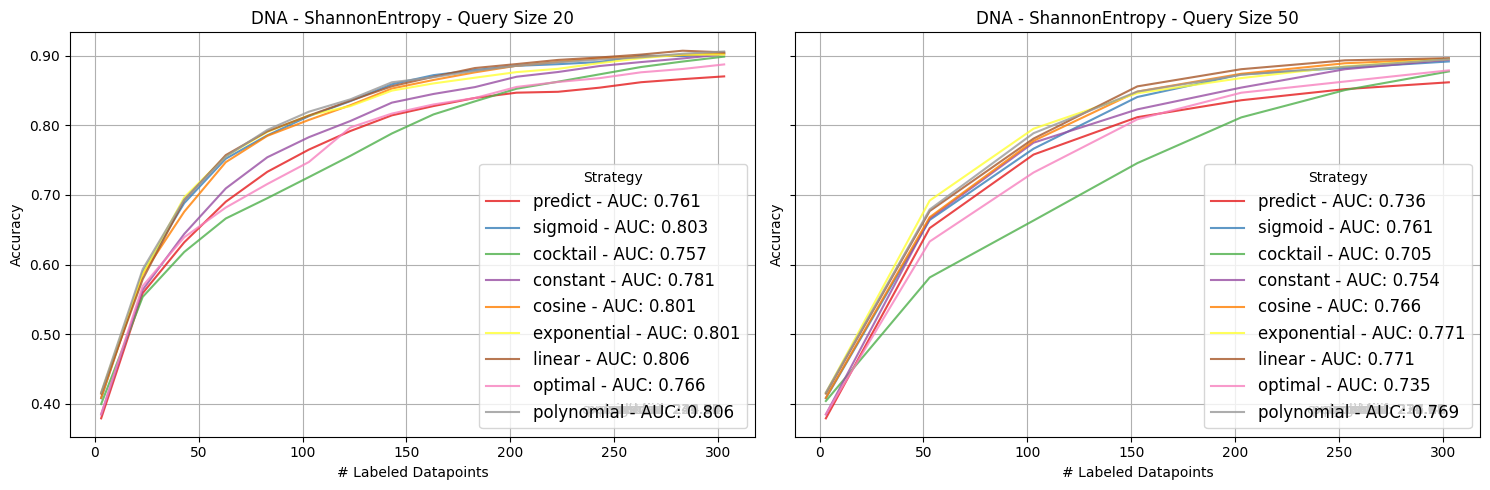

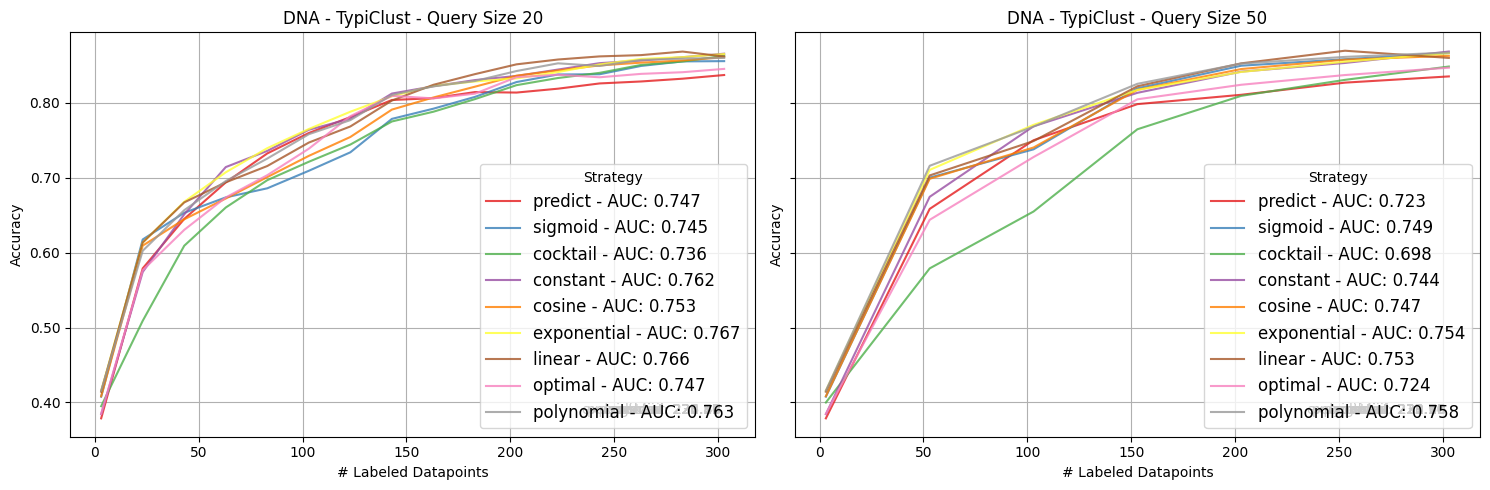

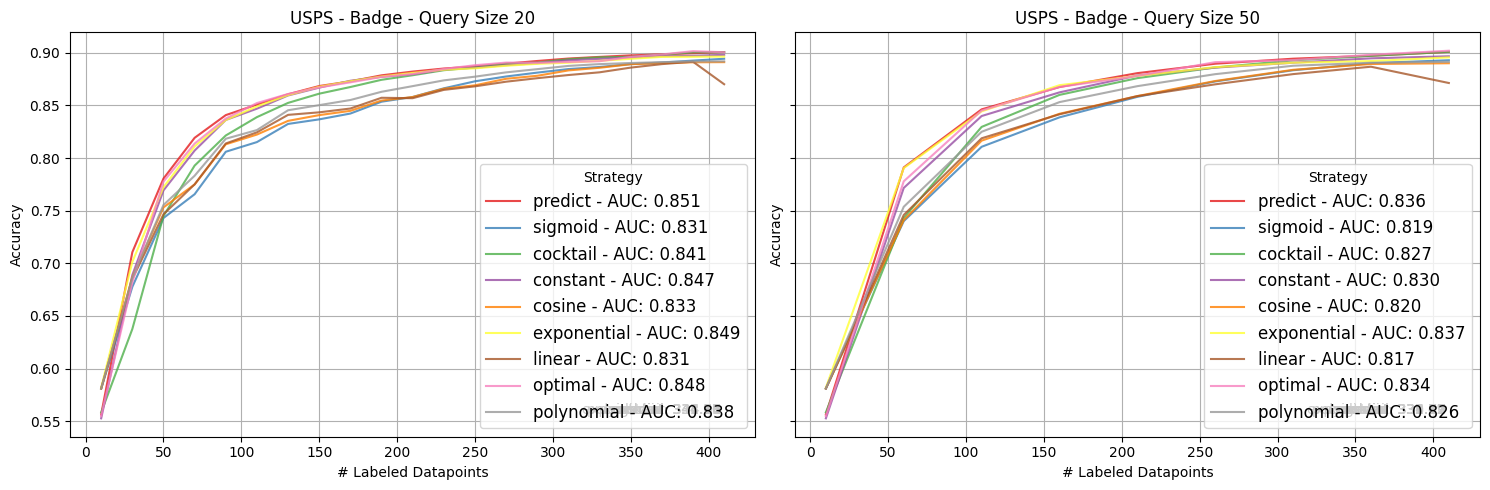

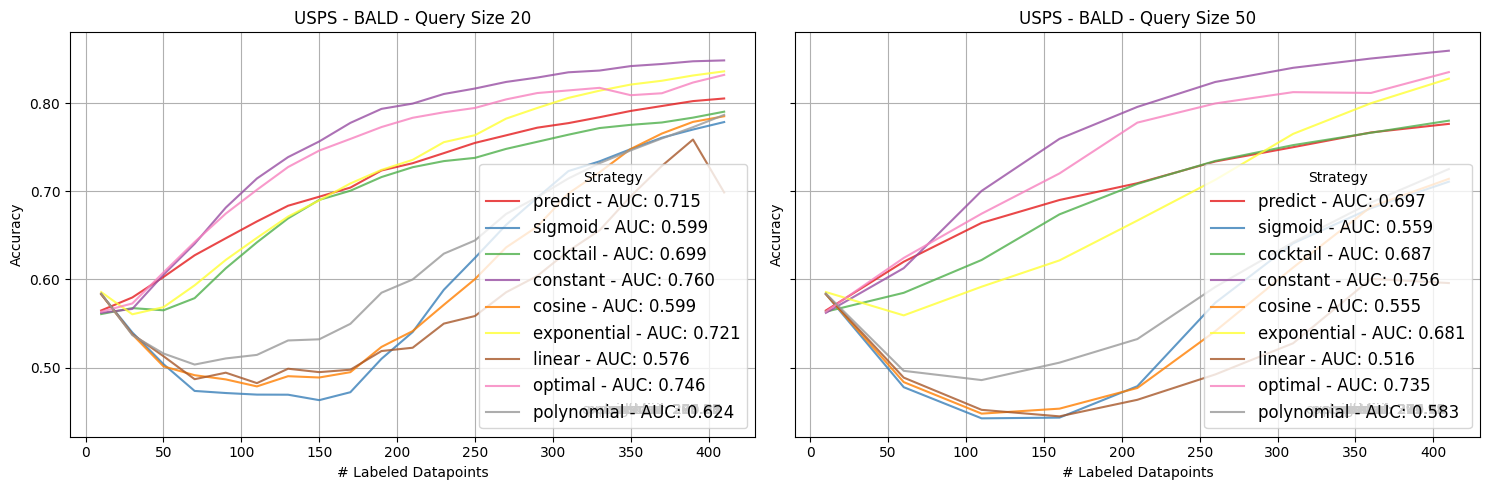

Data not found for USPS, Coreset_Greedy, 20, cocktail


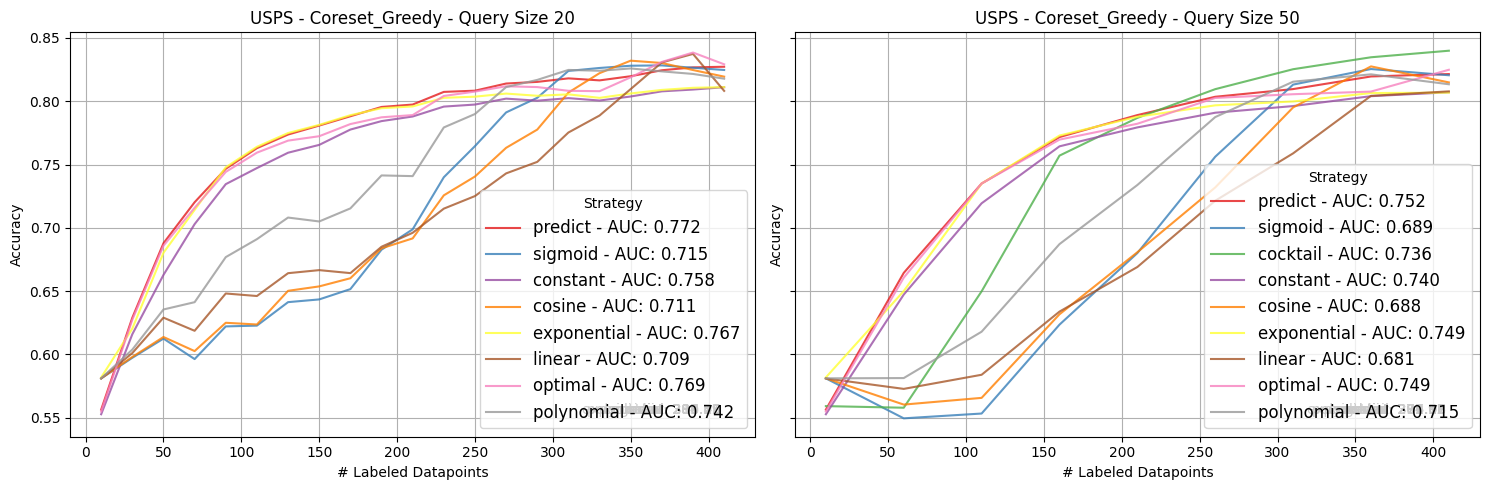

Data not found for USPS, MarginScore, 20, cocktail


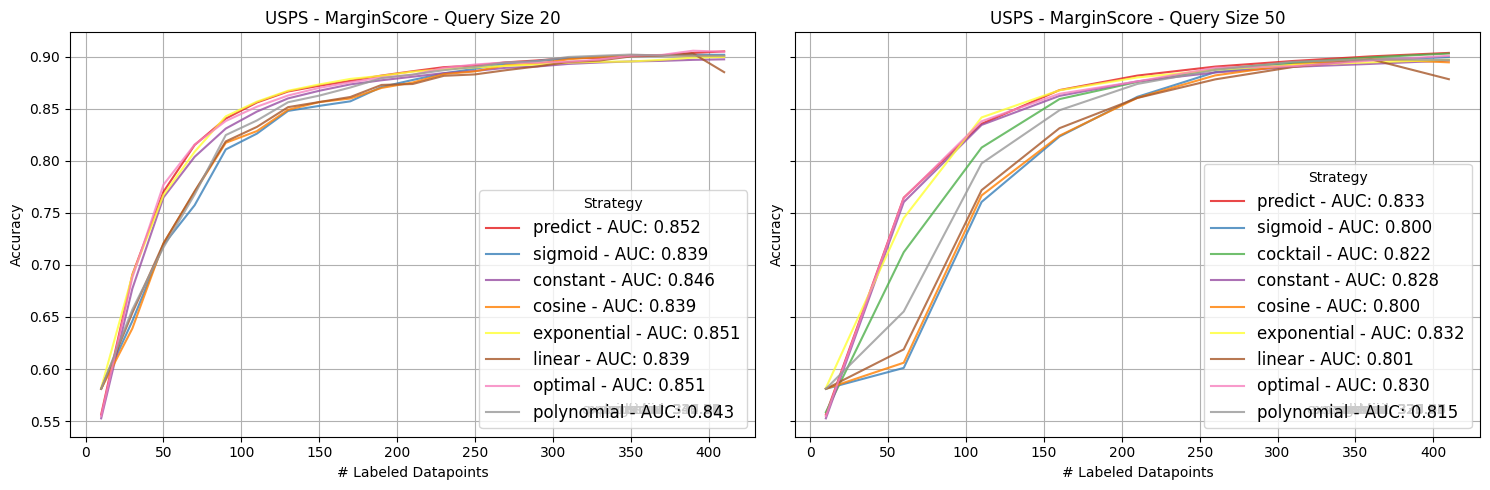

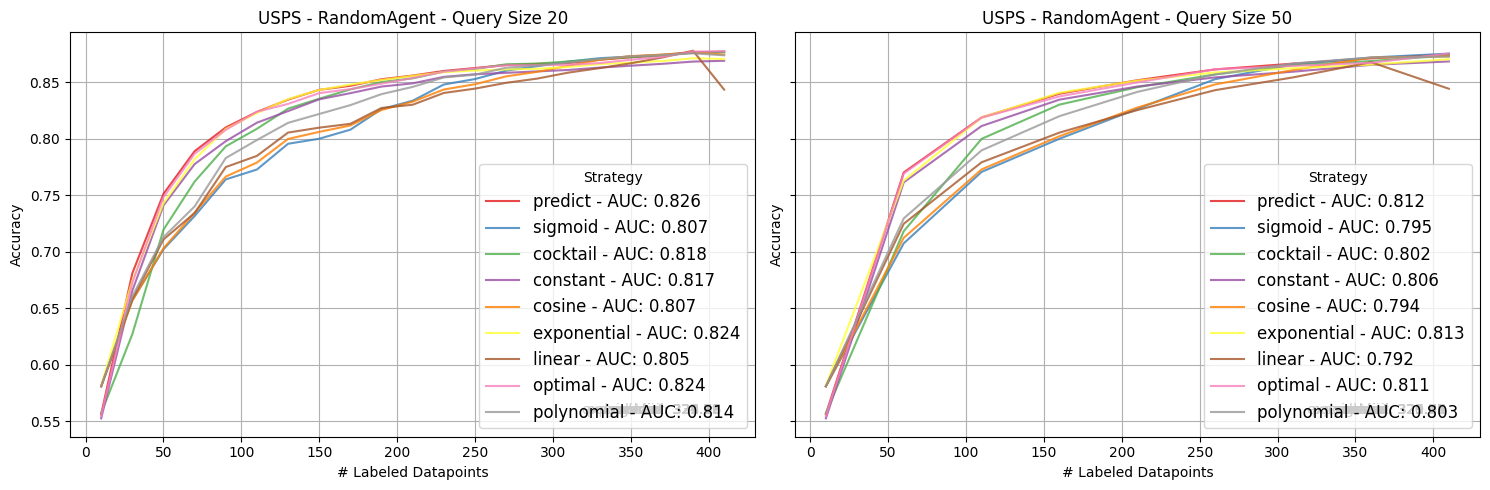

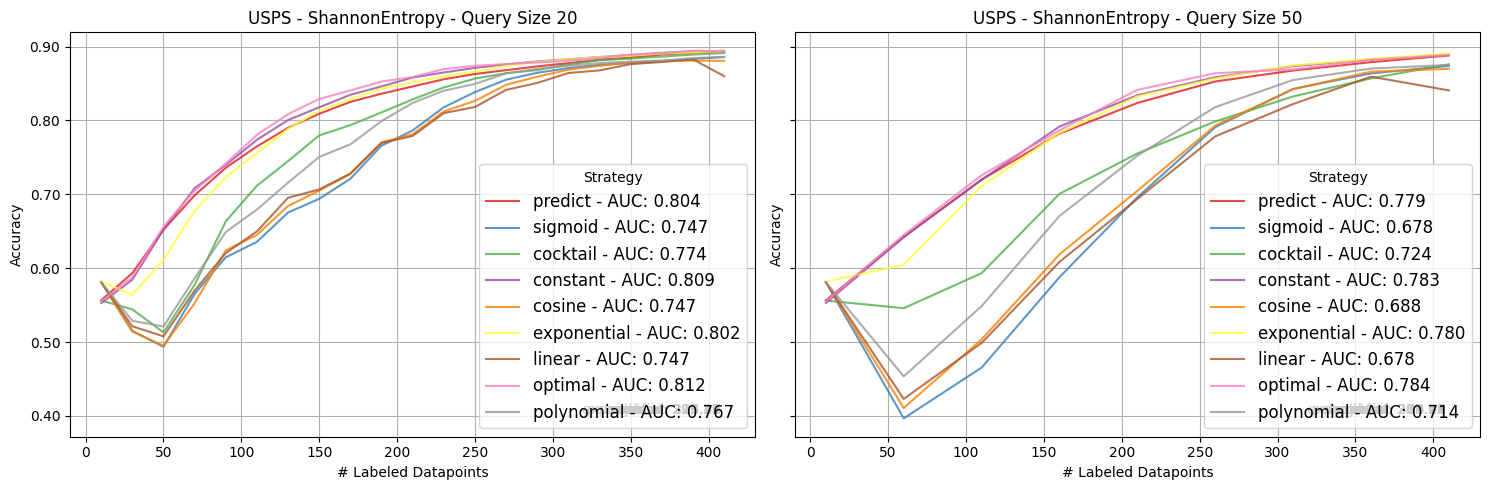

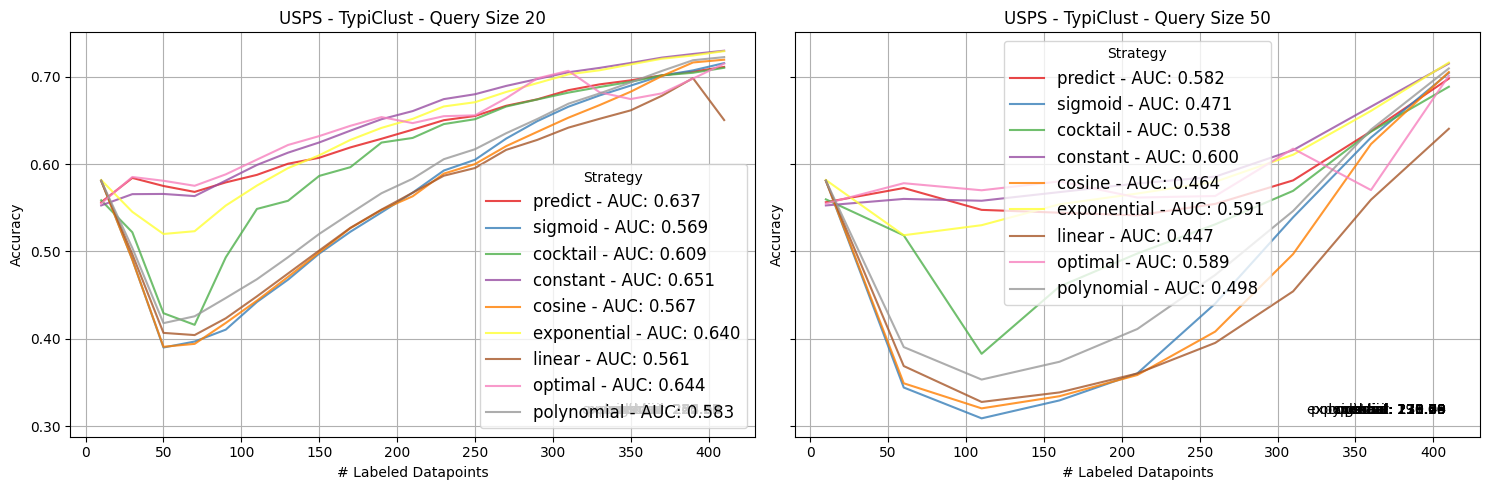

Data not found for Splice, Badge, 50, cosine
Data not found for Splice, Badge, 50, exponential
Data not found for Splice, Badge, 50, linear
Data not found for Splice, Badge, 50, polynomial


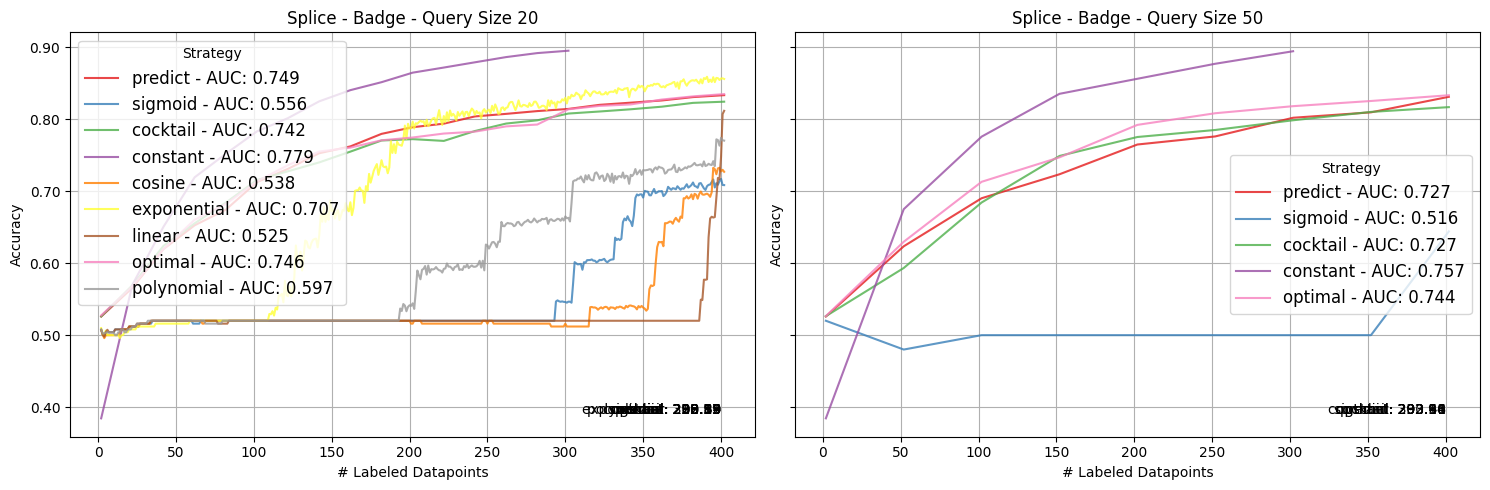

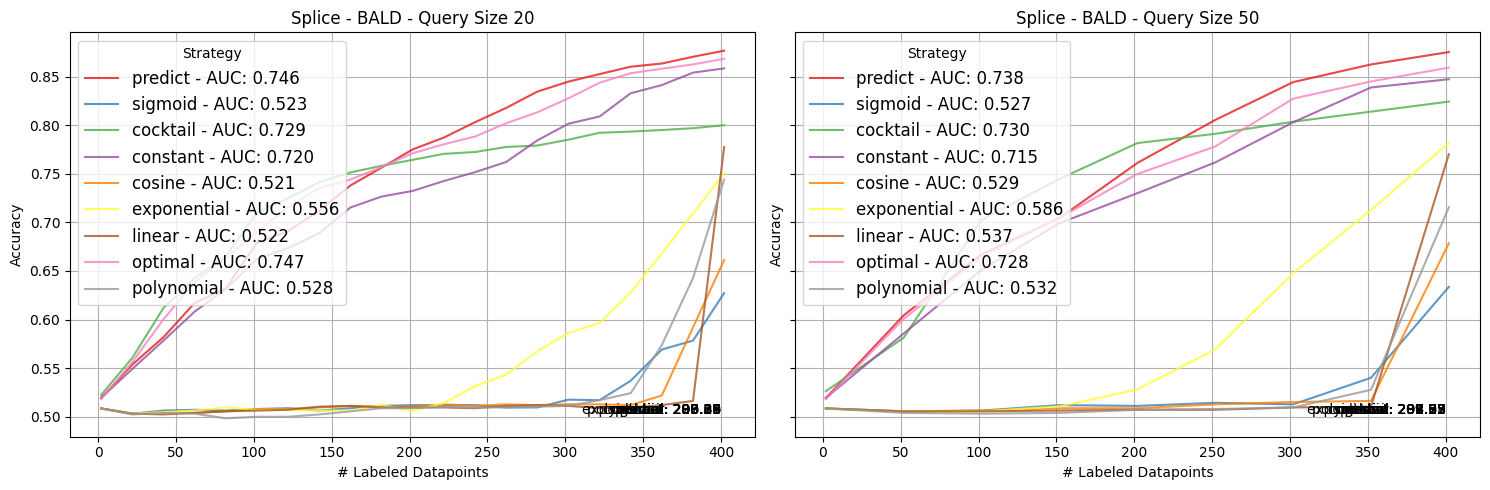

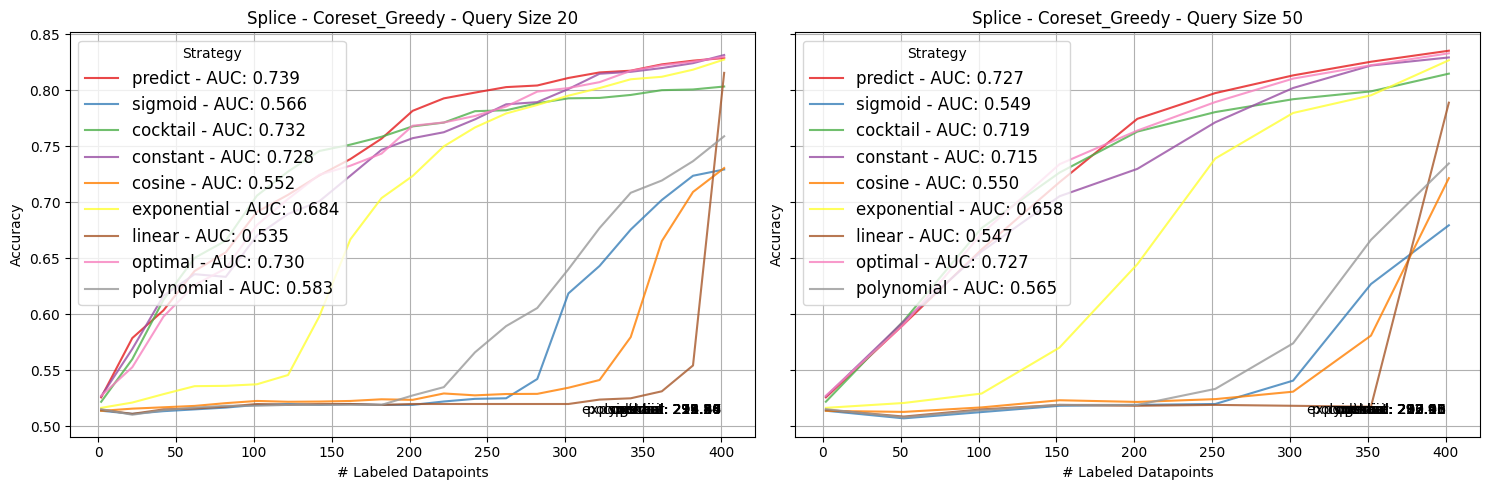

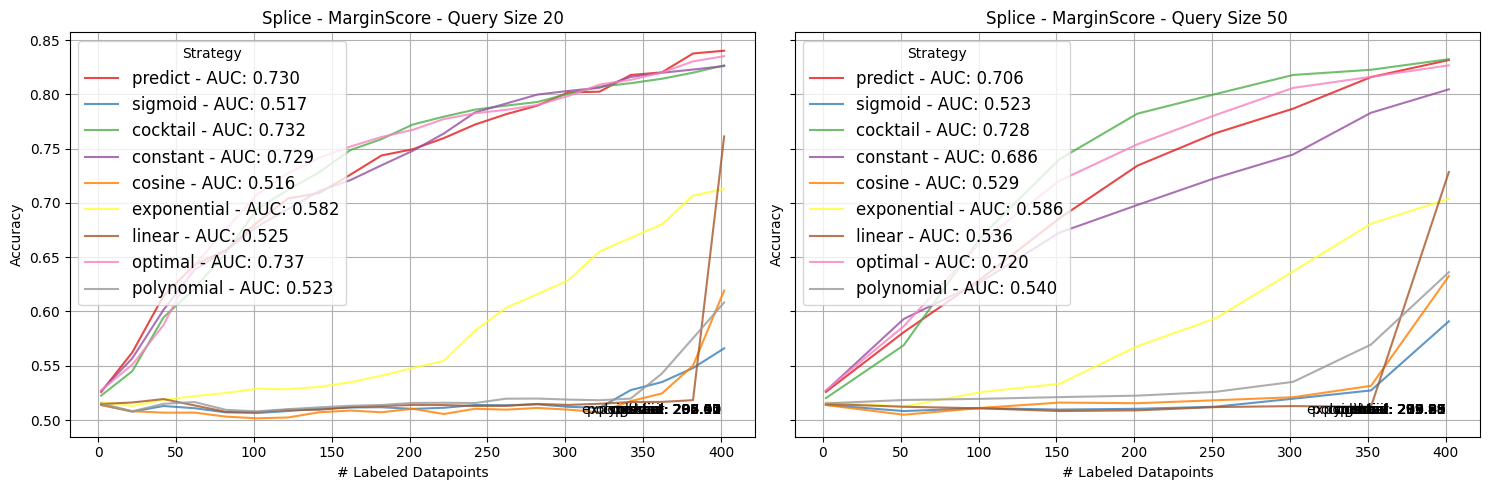

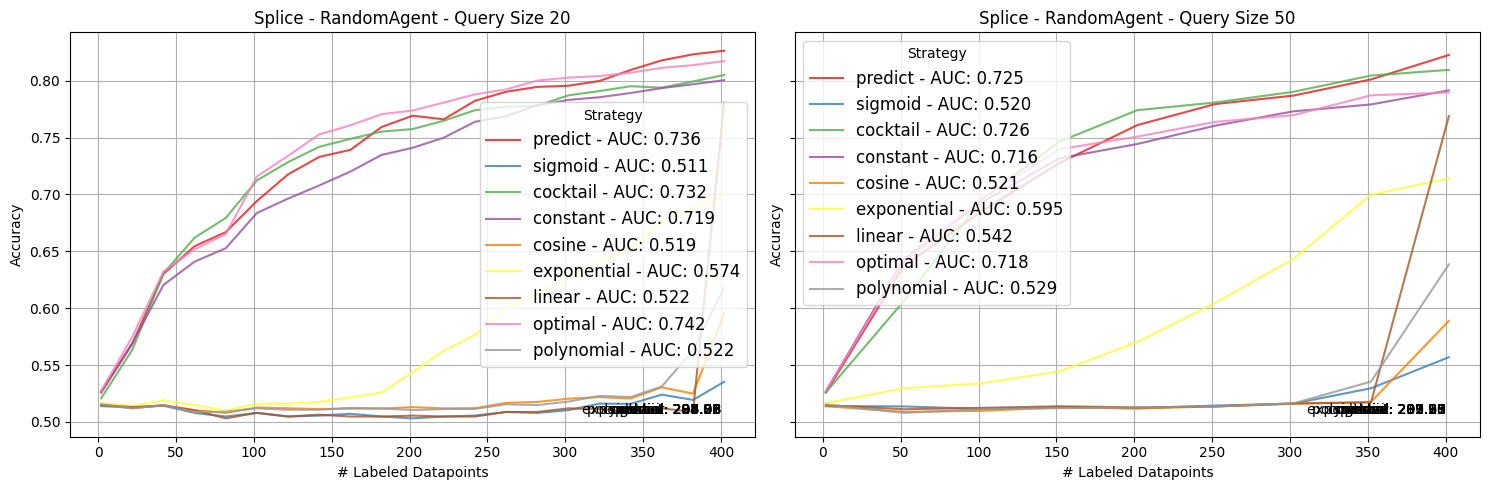

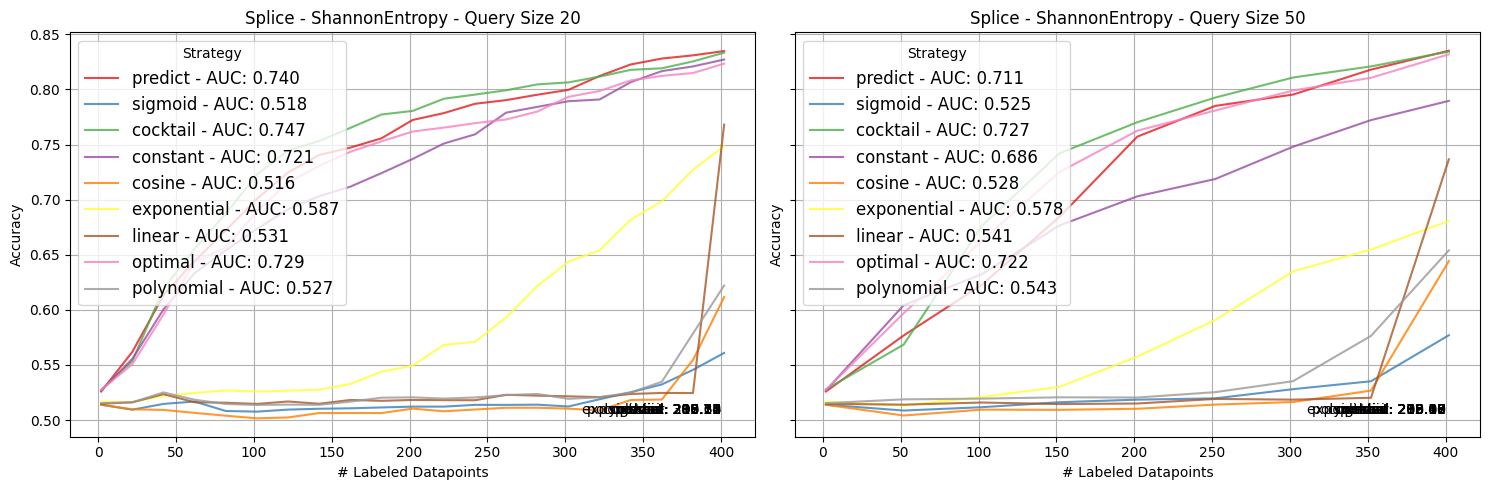

Data not found for Splice, TypiClust, 20, sigmoid
Data not found for Splice, TypiClust, 20, polynomial


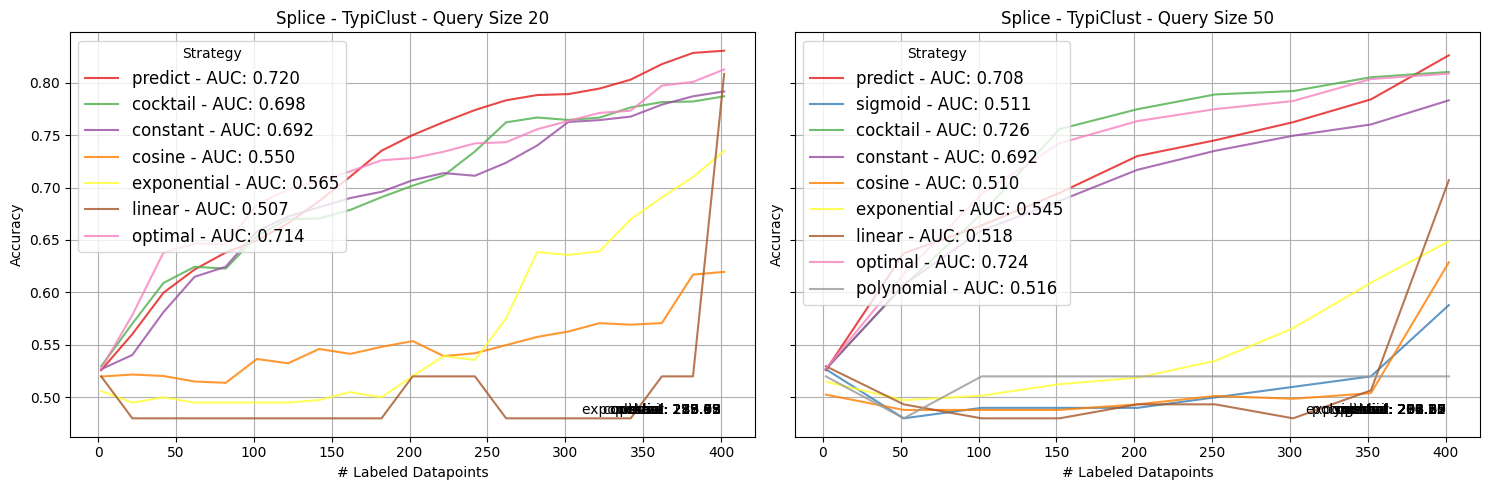

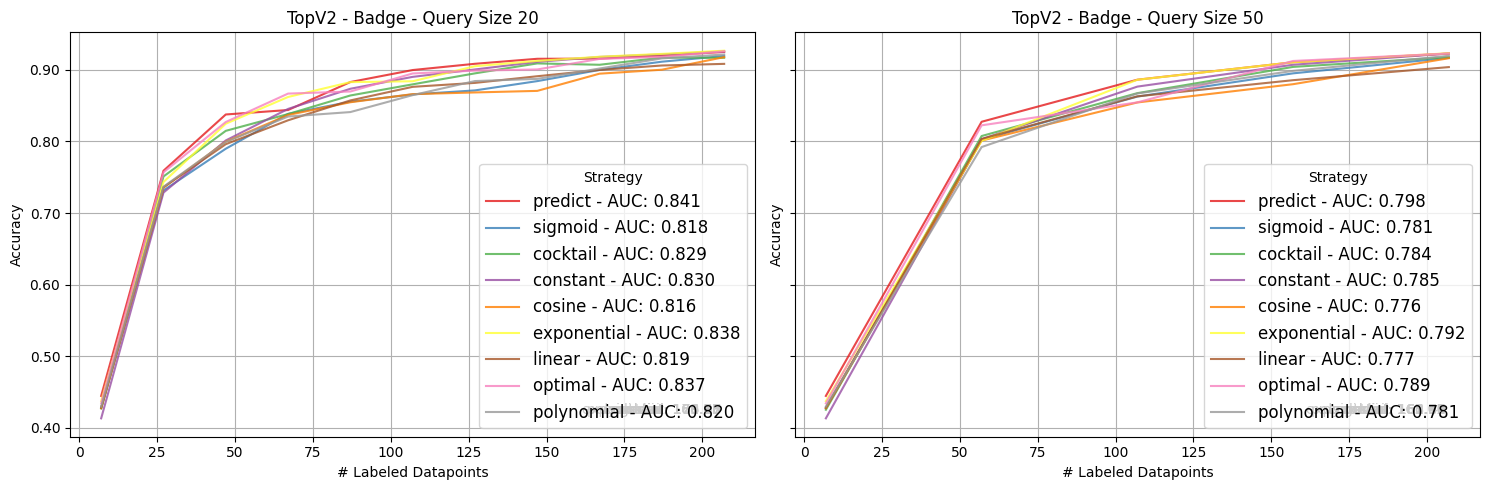

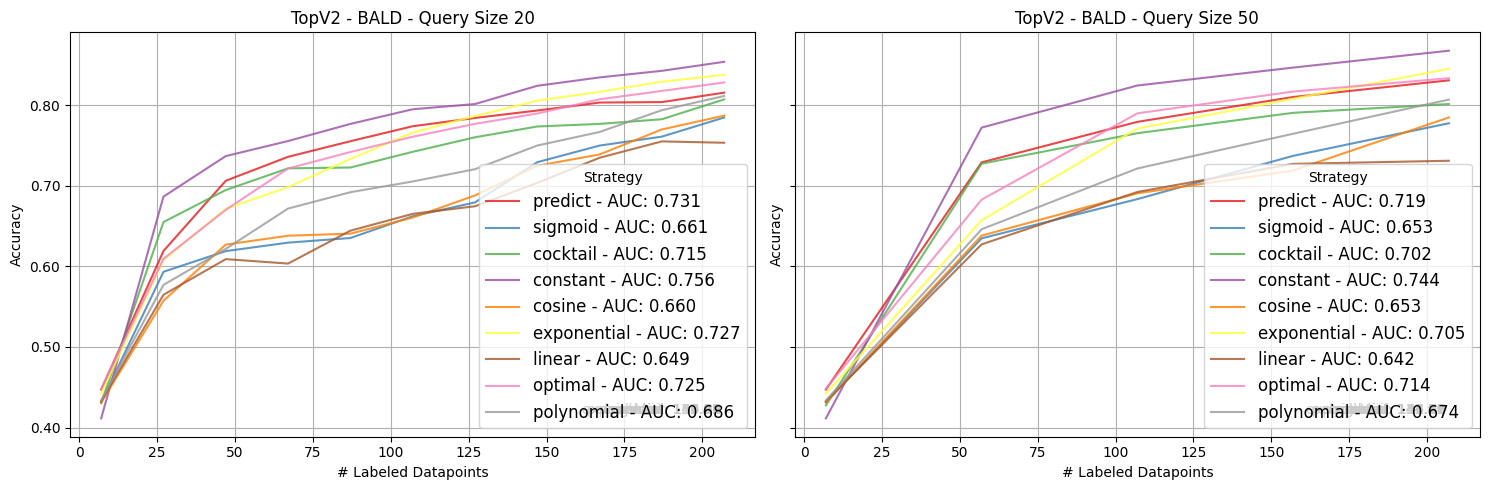

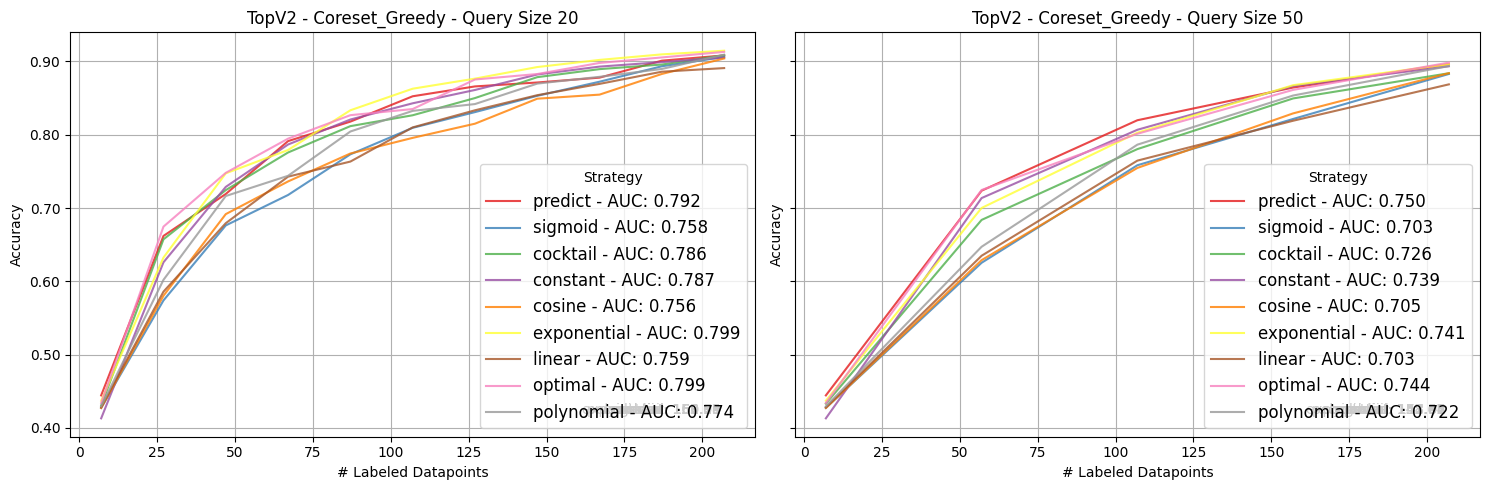

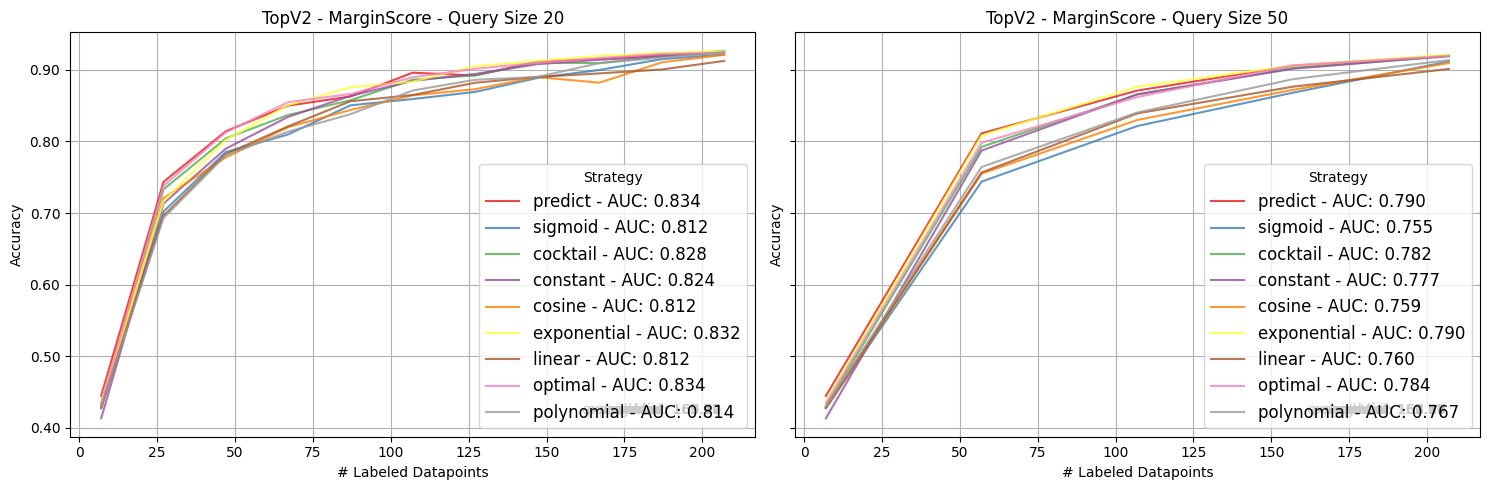

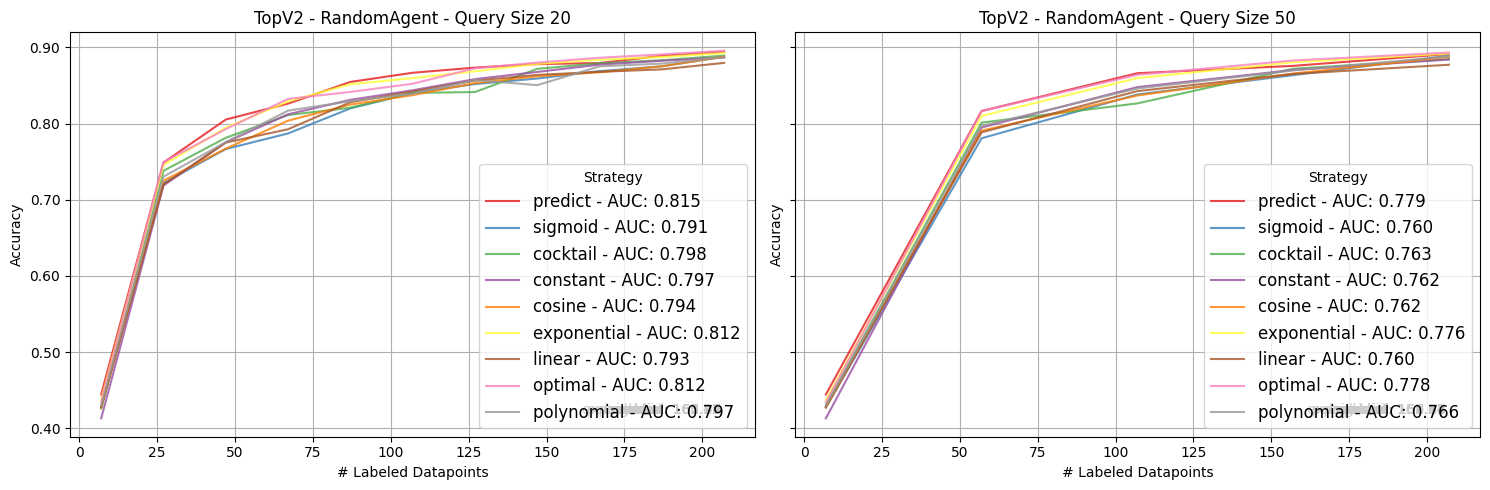

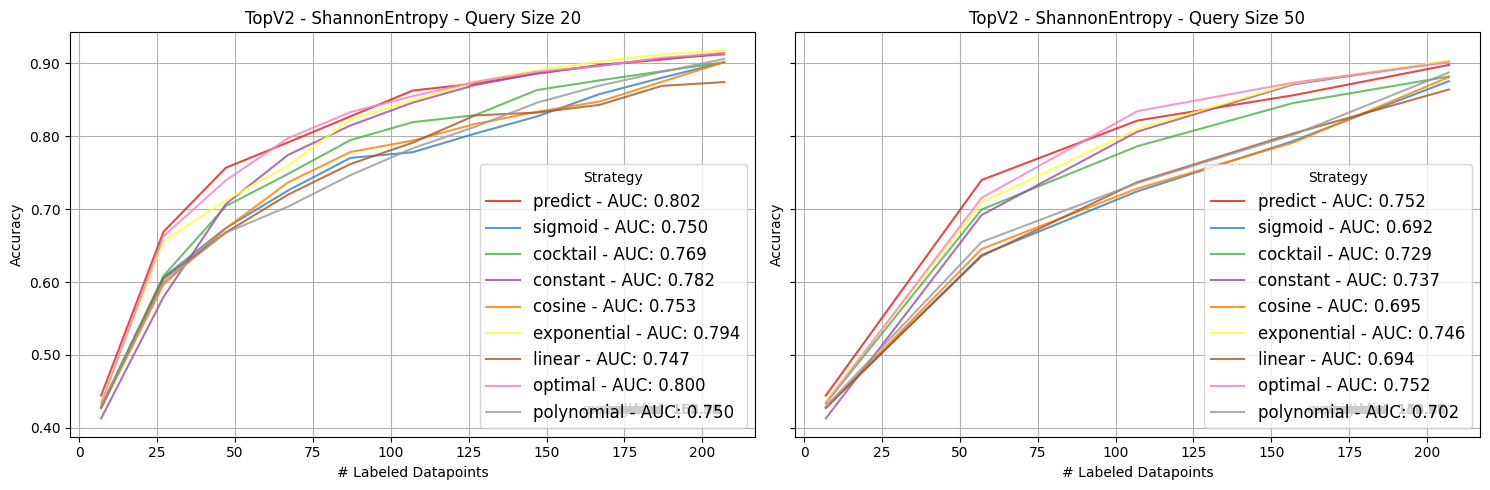

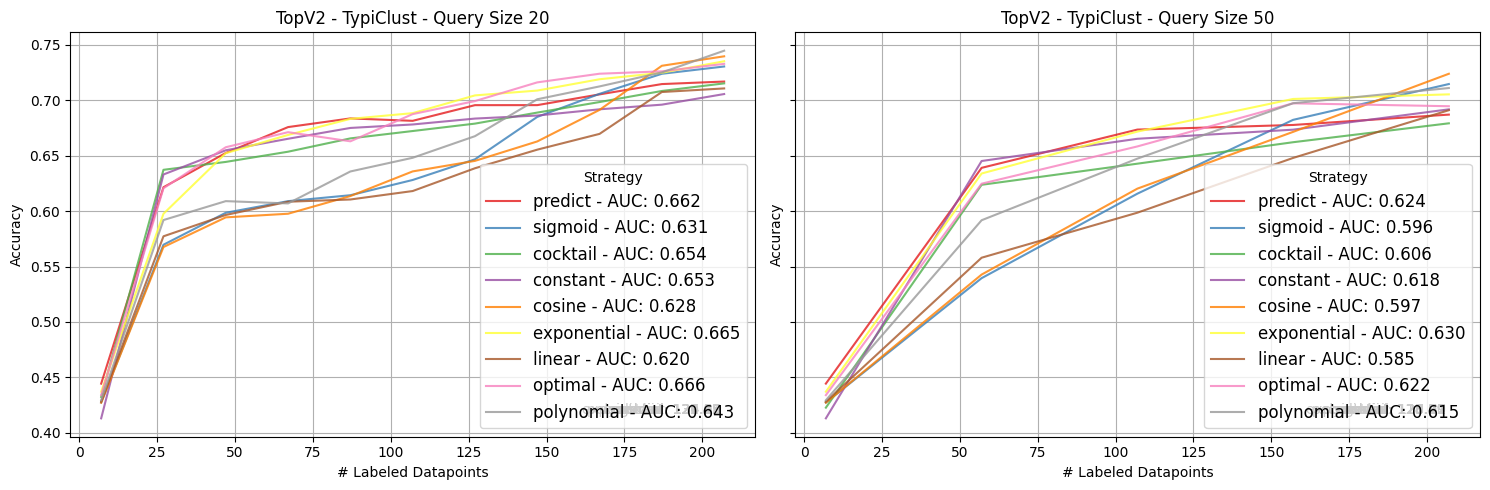

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from sklearn.metrics import auc
from core.helper_functions import _load_eval_data, plot_batch_benchmark

def plot_agent_strategies_auc(dataset, query_sizes, agent, strategies, base_path):
    # Set up the plot with subplots for each query size
    fig, axs = plt.subplots(1, len(query_sizes), figsize=(15, 5), sharey=True)
    
    colors = plt.cm.Set1(np.linspace(0, 1, len(strategies)))
    
    for i, query_size in enumerate(query_sizes):
        ax = axs[i]
        auc_values = {}
        for color, strategy in zip(colors, strategies):
            # Define path and load data
            try:
                x, y, _ = _load_eval_data(dataset, query_size, f"{agent}_{strategy}")
                # Compute AUC and store it
                strategy_auc = auc(x, y)
                auc_values[strategy] = strategy_auc
                # Plot the strategy
                plot_batch_benchmark(ax, x, y, color, strategy)
            except FileNotFoundError:
                print(f"Data not found for {dataset}, {agent}, {query_size}, {strategy}")
                continue
        
        # Annotate AUC values on the subplot
        for strategy, strategy_auc in auc_values.items():
            ax.text(0.95, 0.05, f"{strategy}: {strategy_auc:.2f}",
                    transform=ax.transAxes, fontsize=10,
                    verticalalignment='bottom', horizontalalignment='right')
        
        ax.set_title(f"{dataset} - {agent} - Query Size {query_size}")
        ax.set_xlabel("# Labeled Datapoints")
        ax.set_ylabel("Accuracy")
        ax.yaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
        ax.grid(visible=True)
        ax.legend(title="Strategy", loc='best', fontsize='large')
    
    plt.tight_layout()
    plt.show()

# Parameters
base_path = "D:/School/Hildesheim/Thesis/Code-Base/Results/Experiments"
datasets = ["DNA", "USPS", "Splice", "TopV2"]
query_sizes = [20, 50]  # Modify as needed
agents = ["Badge", "BALD", "Coreset_Greedy", "MarginScore", "RandomAgent", "ShannonEntropy", "TypiClust"]
strategies = ["predict", "sigmoid", "cocktail", "constant", "cosine", "exponential", "linear", "optimal", "polynomial"]

# Loop through datasets and agents to create AUC plots
for dataset in datasets:
    for agent in agents:
        plot_agent_strategies_auc(dataset, query_sizes, agent, strategies, base_path)